In [ ]:
import numpy as np
from PIL import Image
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d anshtanwar/pets-facial-expression-dataset

Dataset URL: https://www.kaggle.com/datasets/anshtanwar/pets-facial-expression-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
pets-facial-expression-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip pets-facial-expression-dataset.zip

Archive:  pets-facial-expression-dataset.zip
  inflating: Angry/02.jpg            
  inflating: Angry/03.jpg            
  inflating: Angry/04.jpg            
  inflating: Angry/05.jpg            
  inflating: Angry/06.jpg            
  inflating: Angry/08.jpg            
  inflating: Angry/09.jpg            
  inflating: Angry/10.jpg            
  inflating: Angry/12.jpg            
  inflating: Angry/16.jpg            
  inflating: Angry/17.jpg            
  inflating: Angry/18.jpg            
  inflating: Angry/19.jpg            
  inflating: Angry/20.jpg            
  inflating: Angry/21.jpg            
  inflating: Angry/22.jpg            
  inflating: Angry/23.jpg            
  inflating: Angry/24.jpg            
  inflating: Angry/25.jpg            
  inflating: Angry/26.jpg            
  inflating: Angry/27.jpg            
  inflating: Angry/28.jpg            
  inflating: Angry/29.jpg            
  inflating: Angry/30.jpg            
  inflating: Angry/31.jpg            
  inf

In [ ]:
# Set the directory where the dataset is located
dataset_dir = '/content/Sad'

# Create an empty list to store the images
images = []

# Loop through the first 10 files in the dataset directory
for i, filename in enumerate(os.listdir(dataset_dir)):
    if i < 10:
        # Open the image file
        image_path = os.path.join(dataset_dir, filename)
        image = Image.open(image_path)

        # Resize the image to a consistent size
        image = image.resize((224, 224)) # Choose a suitable size

        # Convert the image to a NumPy array
        image_array = np.array(image)

        # Add the image array to the list
        images.append(image_array)
    else:
        break

# Convert the list of image arrays to a NumPy array
images_array = np.array(images)

# For example, you can normalize the pixel values:
images_array = images_array / 255.0

In [ ]:
def apply_augmentation(image):
    augmented_images = []

    # Rotation
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    augmented_images.append(rotated_image)

    # Flipping
    flipped_image = cv2.flip(image, 1)  # Horizontal flip
    augmented_images.append(flipped_image)

    # Stretching
    stretched_image = cv2.resize(image, (256, 192), interpolation=cv2.INTER_LINEAR)
    stretched_image = cv2.resize(stretched_image, (224, 224), interpolation=cv2.INTER_LINEAR) # Resize back to 224x224
    augmented_images.append(stretched_image)

    # Shrinking
    shrinked_image = cv2.resize(image, (192, 192), interpolation=cv2.INTER_LINEAR)
    shrinked_image = cv2.resize(shrinked_image, (224, 224), interpolation=cv2.INTER_LINEAR) # Resize back to 224x224
    augmented_images.append(shrinked_image)

    # Brightness adjustment
    brightness_image = np.clip(image * 1.2, 0, 1)
    augmented_images.append(brightness_image)

    # Smoothing
    smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)
    augmented_images.append(smoothed_image)

    # Sharpening
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    augmented_images.append(sharpened_image)

    # Add noise
    noise_image = image + 0.1 * np.random.normal(0, 1, image.shape)
    noise_image = np.clip(noise_image, 0, 1)
    augmented_images.append(noise_image)

    # Gaussian Noise
    gaussian_noise = np.random.normal(0, 0.1, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 1)
    augmented_images.append(noisy_image)

    # Salt and Pepper Noise
    salt_pepper_noise = np.random.randint(0, 2, image.shape) * 2 - 1
    noisy_image = image + 0.1 * salt_pepper_noise
    noisy_image = np.clip(noisy_image, 0, 1)
    augmented_images.append(noisy_image)

    # Contrast Adjustment
    contrast_image = np.clip((image - 0.5) * 1.5 + 0.5, 0, 1)
    augmented_images.append(contrast_image)

    # Cropping
    h, w, _ = image.shape
    x = np.random.randint(0, w - 192)
    y = np.random.randint(0, h - 192)
    cropped_image = image[y:y+192, x:x+192]
    cropped_image = cv2.resize(cropped_image, (224, 224), interpolation=cv2.INTER_LINEAR)
    augmented_images.append(cropped_image)

    return np.array(augmented_images)

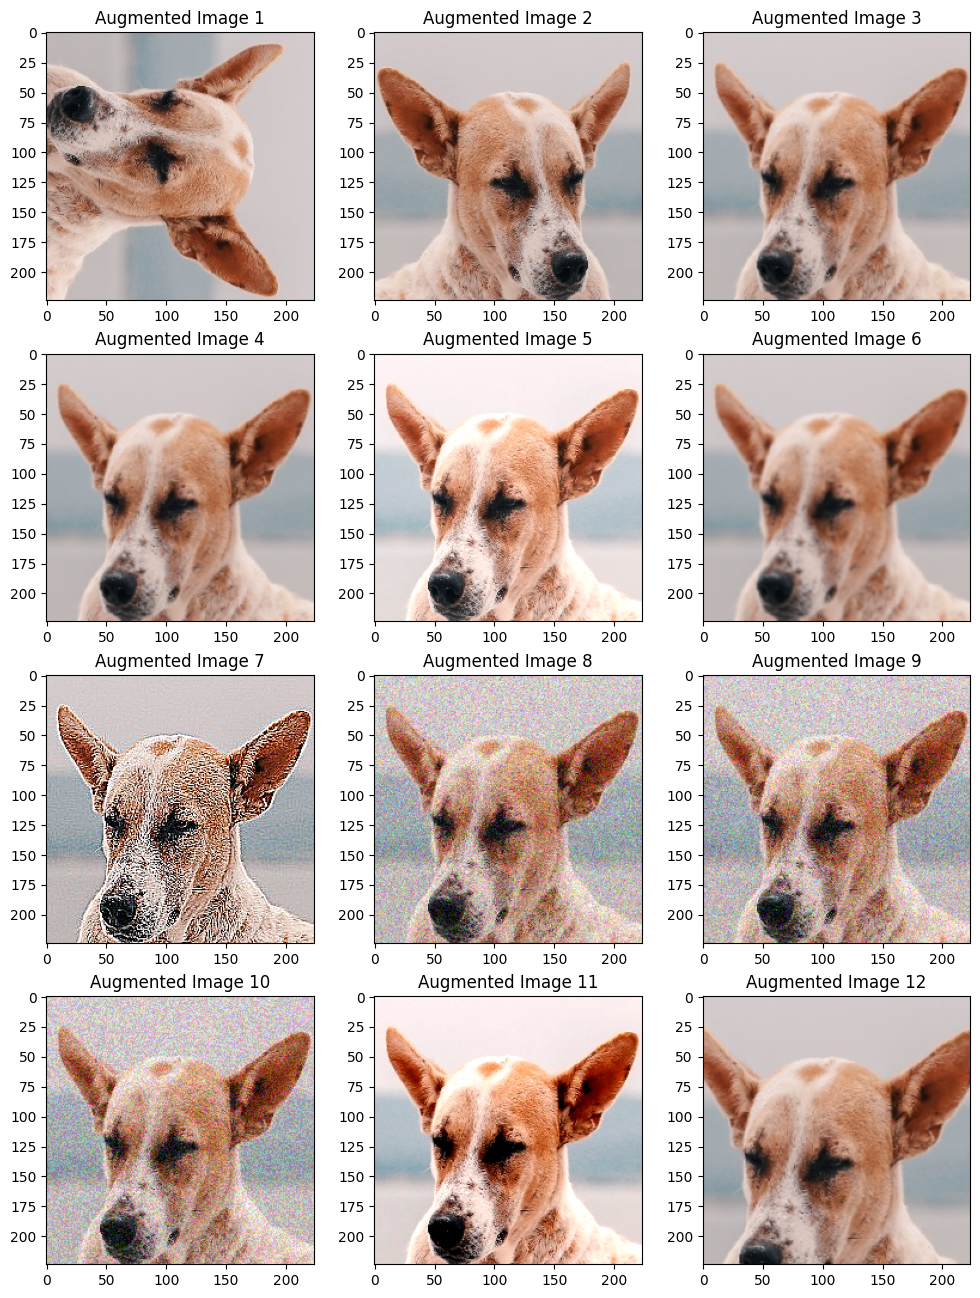

In [ ]:
# Apply augmentation to the first image
augmented_images_array = apply_augmentation(images_array[0])

# Display the original and augmented images
fig, axes = plt.subplots(4, 3, figsize=(12, 16))

# Display the original image
axes[0, 0].imshow(images_array[0])
axes[0, 0].set_title("Original Image")

# Display the augmented images
for i in range(len(augmented_images_array)):
    row = i // 3
    col = i % 3
    axes[row , col].imshow(augmented_images_array[i])
    axes[row , col].set_title(f"Augmented Image {i+1}")

plt.show()

In [ ]:
# Apply augmentation to all images
all_augmented_images = []
for image in images_array:
    augmented_images = apply_augmentation(image)
    all_augmented_images.extend(augmented_images)

# Convert the list of augmented images to a NumPy array
all_augmented_images_array = np.array(all_augmented_images)

# Print the number of original and augmented images
num_original_images = images_array.shape[0]
num_augmented_images = all_augmented_images_array.shape[0]
print(f"Number of original images: {num_original_images}")
print(f"Number of augmented images: {num_augmented_images}")

Number of original images: 10
Number of augmented images: 120


In [ ]:
# Check if all augmented images are unique
unique_images = np.unique(all_augmented_images_array, axis=0)
if len(unique_images) == all_augmented_images_array.shape[0]:
    print("All augmented images are unique.")
else:
    print("Some augmented images are not unique.")

All augmented images are unique.


In [ ]:
# Save the result to a file
result_filename = "augmented_images.npy"
np.save(result_filename, all_augmented_images_array)
print(f"Augmented images saved to '{result_filename}'")

Augmented images saved to 'augmented_images.npy'
